In [1]:
import numpy as np
import numpy.random as rd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

# 1. Get the big picture of what the data is about.

Berisi tentang laporan reservasi Hotel secara detail yang berisi tentang informasi seperti kamar,
tempat parkir khusus, asal negara, tanggal reservasi, dan lain-lain.

In [2]:
d_htl = pd.read_csv('hotel.csv')

In [3]:
a = d_htl.isnull().sum().items()
print("Kolum Yang Memiliki Data Kosong Dan Jumlahnya:")
for i, b in a:
    if b > 0:
        print(i, b)
print("Total Data Kosong: ", d_htl.isnull().sum().sum())

Kolum Yang Memiliki Data Kosong Dan Jumlahnya:
children 4
country 488
agent 16340
company 112593
Total Data Kosong:  129425


In [4]:
d_htl.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
a=d_htl.isna().any().items()
print("Tidak Memiliki Data Kosong:")
for i,b in a:
    if b == False:
        print(i)

Tidak Memiliki Data Kosong:
hotel
is_canceled
lead_time
arrival_date_year
arrival_date_month
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
babies
meal
market_segment
distribution_channel
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
reserved_room_type
assigned_room_type
booking_changes
deposit_type
days_in_waiting_list
customer_type
adr
required_car_parking_spaces
total_of_special_requests
reservation_status
reservation_status_date


In [6]:
num = d_htl.select_dtypes([np.int64, np.float64])

In [7]:
np.mean(num)

is_canceled                          0.370416
lead_time                          104.011416
arrival_date_year                 2016.156554
arrival_date_week_number            27.165173
arrival_date_day_of_month           15.798241
stays_in_weekend_nights              0.927599
stays_in_week_nights                 2.500302
adults                               1.856403
children                             0.103890
babies                               0.007949
is_repeated_guest                    0.031912
previous_cancellations               0.087118
previous_bookings_not_canceled       0.137097
booking_changes                      0.221124
agent                               86.693382
company                            189.266735
days_in_waiting_list                 2.321149
adr                                101.831122
required_car_parking_spaces          0.062518
total_of_special_requests            0.571363
dtype: float64

In [8]:
print("Terdapat Data Sebanyak: ",np.size(d_htl))

Terdapat Data Sebanyak:  3820480


In [9]:
np.std(num)

is_canceled                         0.482916
lead_time                         106.862650
arrival_date_year                   0.707473
arrival_date_week_number           13.605081
arrival_date_day_of_month           8.780793
stays_in_weekend_nights             0.998609
stays_in_week_nights                1.908278
adults                              0.579259
children                            0.398560
babies                              0.097436
is_repeated_guest                   0.175766
previous_cancellations              0.844333
previous_bookings_not_canceled      1.497431
booking_changes                     0.652303
agent                             110.774010
company                           131.645329
days_in_waiting_list               17.594647
adr                                50.535579
required_car_parking_spaces         0.245290
total_of_special_requests           0.792795
dtype: float64

In [10]:
np.median(num)

nan

In [11]:
num.min()

is_canceled                          0.00
lead_time                            0.00
arrival_date_year                 2015.00
arrival_date_week_number             1.00
arrival_date_day_of_month            1.00
stays_in_weekend_nights              0.00
stays_in_week_nights                 0.00
adults                               0.00
children                             0.00
babies                               0.00
is_repeated_guest                    0.00
previous_cancellations               0.00
previous_bookings_not_canceled       0.00
booking_changes                      0.00
agent                                1.00
company                              6.00
days_in_waiting_list                 0.00
adr                                 -6.38
required_car_parking_spaces          0.00
total_of_special_requests            0.00
dtype: float64

In [12]:
num.max()

is_canceled                          1.0
lead_time                          737.0
arrival_date_year                 2017.0
arrival_date_week_number            53.0
arrival_date_day_of_month           31.0
stays_in_weekend_nights             19.0
stays_in_week_nights                50.0
adults                              55.0
children                            10.0
babies                              10.0
is_repeated_guest                    1.0
previous_cancellations              26.0
previous_bookings_not_canceled      72.0
booking_changes                     21.0
agent                              535.0
company                            543.0
days_in_waiting_list               391.0
adr                               5400.0
required_car_parking_spaces          8.0
total_of_special_requests            5.0
dtype: float64

In [13]:
d_htl.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [14]:
drp = d_htl.columns[d_htl.isnull().mean()>0.5]

In [15]:
d_htl.drop(drp, axis=1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [16]:
d_htl.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [17]:
d_htl['agent'].fillna(d_htl['agent'].mean(), inplace=True)

In [18]:
d_htl['agent'].isna().sum()

0

In [19]:
d_htl['country'].mode()

0    PRT
dtype: object

In [20]:
d_htl['country'].fillna(d_htl['country'].mode()[0], inplace=True)

In [21]:
d_htl['country'].isna().sum()

0

In [22]:
d_htl['children'].mode()[0]

0.0

In [23]:
d_htl['children'].fillna(d_htl['children'].mode()[0], inplace=True)

In [24]:
d_htl['children'].isna().sum()

0

In [25]:
d_htl["lead_time"].max()

737

In [26]:
d_htl["lead_time"] = np.where(d_htl["lead_time"] < 122, 'Short', (np.where(d_htl["lead_time"] < 245, 'Medium', 'Long')))

In [27]:
d_htl

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,Long,2015,July,27,1,0,0,2,...,No Deposit,86.693382,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,Long,2015,July,27,1,0,0,2,...,No Deposit,86.693382,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,Short,2015,July,27,1,0,1,1,...,No Deposit,86.693382,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,Short,2015,July,27,1,0,1,1,...,No Deposit,304.000000,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,Short,2015,July,27,1,0,2,2,...,No Deposit,240.000000,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,Short,2017,August,35,30,2,5,2,...,No Deposit,394.000000,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,Short,2017,August,35,31,2,5,3,...,No Deposit,9.000000,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,Short,2017,August,35,31,2,5,2,...,No Deposit,9.000000,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,Short,2017,August,35,31,2,5,2,...,No Deposit,89.000000,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [28]:
d_htl["reservation_status_date"] = pd.to_datetime(d_htl["reservation_status_date"])

In [29]:
d_htl.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                 object
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [30]:
th_2017=d_htl['reservation_status_date'] >= '2017-01-1'
d_htl.loc[th_2017]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
9788,Resort Hotel,1,Short,2017,January,1,2,1,3,2,...,No Deposit,240.000000,NaN,0,Transient,46.80,0,1,No-Show,2017-01-02
9805,Resort Hotel,1,Short,2017,January,1,4,0,1,1,...,No Deposit,86.693382,NaN,0,Transient,39.00,0,0,Canceled,2017-01-03
9809,Resort Hotel,1,Short,2017,January,1,4,2,4,2,...,No Deposit,240.000000,NaN,0,Transient,52.00,0,2,No-Show,2017-01-04
9813,Resort Hotel,1,Short,2017,January,1,5,0,3,2,...,No Deposit,240.000000,NaN,0,Transient,48.00,0,0,Canceled,2017-01-01
9818,Resort Hotel,1,Short,2017,January,1,6,2,3,1,...,No Deposit,240.000000,NaN,0,Transient,43.00,0,1,No-Show,2017-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,Short,2017,August,35,30,2,5,2,...,No Deposit,394.000000,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,Short,2017,August,35,31,2,5,3,...,No Deposit,9.000000,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,Short,2017,August,35,31,2,5,2,...,No Deposit,9.000000,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,Short,2017,August,35,31,2,5,2,...,No Deposit,89.000000,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [31]:
Counter(d_htl['arrival_date_month'])

Counter({'July': 12661,
         'August': 13877,
         'September': 10508,
         'October': 11160,
         'November': 6794,
         'December': 6780,
         'January': 5929,
         'February': 8068,
         'March': 9794,
         'April': 11089,
         'May': 11791,
         'June': 10939})

In [32]:
arv = d_htl['arrival_date_month']
arv2_c = Counter()
for arrival in arv:
    arv2_c.update(arrival.split(';'))


In [33]:
x = np.arange(len(arv2_c.keys()))
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [34]:
y = np.array(list(arv2_c.values()))
y

array([12661, 13877, 10508, 11160,  6794,  6780,  5929,  8068,  9794,
       11089, 11791, 10939])

In [35]:
xlbl = np.array(list(arv2_c.keys()))
xlbl

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype='<U9')

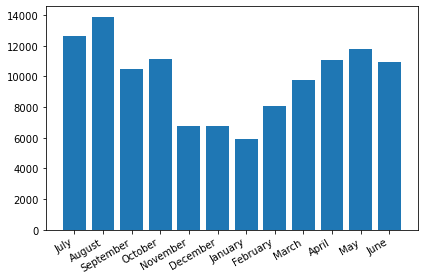

In [36]:
fig, visual = plt.subplots()
visual.bar(x,y)
visual.set_xticks(x)
visual.set_xticklabels(list(arv2_c.keys()))
plt.setp(visual.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [37]:
d_htl.to_csv('hotel_hasil.csv')